In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
from tqdm import tqdm
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
tqdm.pandas()

# Preparing Data

## 2024 Survey

In [2]:
survey24 = pd.read_excel("Risk Literacy data_Typeform_2024_common investors.xlsx")
survey24 = survey24.rename(
    {"_Distribution 1_\n\nHow risky do you perceive the investment to be?": "NORMAL",
     "_Distribution 2_\n\nHow risky do you perceive the investment to be?": "NegSKEW",
     "_Distribution 3_\n\nHow risky do you perceive the investment to be?": "PosSKEW",
     "_Distribution 4_\n\nHow risky do you perceive the investment to be?":  "BigLOSS",
     "_Distribution 5_\n\nHow risky do you perceive the investment to be?": "WIDER",
     "Distribution 6\n\nHow risky do you perceive the investment to be?":   "FreqLOSS",
     "Distribution 7\n\nHow risky do you perceive the investment to be?":   "NoLOSS",
     "Distribution 8\n\nHow risky do you perceive the investment to be?":   "Kurtosis"
    }, axis = 1)

In [3]:
survey24.columns

Index(['#', 'Please indicate your Gender.', 'Please mark your age (in years)',
       'What is currently your highest Education?',
       'Please state your current occupation.',
       'How do you describe your willingness to take financial risk in general?',
       'Given the number of years that you have held various investments and the amount of investing you might have done, what degree of investment experience in the stock market do you have?',
       'If an expert tries to worry or scare me, i.e. a financial advisor about my financial situation, I choose another expert.',
       'I only buy a financial product I understand.', 'I trust doctors.',
       'When I want to buy a bigger item like a refrigerator or an expensive item of clothing, I wait a month to see whether I still want it and only buy it then.',
       'I always keep in mind that everything I do on the web could be used to my disadvantage.',
       'In my household, we/I spend:', 'In my household, we/I', 'NORMAL',
  

In [4]:
survey24["Please state your current occupation."].value_counts()

Please state your current occupation.
Employee/Consultant in Other than the Finance Sector                                                                                                                                        575
Investment Professional, i.e. stock broker/trader; financial planner/advisor; portfolio manager; investment banker; stock analyst; venture capital/private equity; insurance agent, etc.    247
Entrepreneur or Own Business                                                                                                                                                                141
Student                                                                                                                                                                                      13
Home Maker or not employed                                                                                                                                                                    6
Re

In [5]:
survey24Inv = survey24.loc[survey24["Please state your current occupation."] == "Investment Professional, i.e. stock broker/trader; financial planner/advisor; portfolio manager; investment banker; stock analyst; venture capital/private equity; insurance agent, etc.", :].copy()

In [6]:
survey24Inv

,#,Please indicate your Gender.,Please mark your age (in years),What is currently your highest Education?,Please state your current occupation.,How do you describe your willingness to take financial risk in general?,"Given the number of years that you have held various investments and the amount of investing you might have done, what degree of investment experience in the stock market do you have?","If an expert tries to worry or scare me, i.e. a financial advisor about my financial situation, I choose another expert.",I only buy a financial product I understand.,I trust doctors.,"When I want to buy a bigger item like a refrigerator or an expensive item of clothing, I wait a month to see whether I still want it and only buy it then.",I always keep in mind that everything I do on the web could be used to my disadvantage.,"In my household, we/I spend:","In my household, we/I",NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis,*Mumbai * A = 9 out of 10000 *OR * B = 1 out of 1000,*Bengaluru * A = 0.7% *OR * B = 0.099%,*Kolkata * A = 0.61% *OR * B = 6 out of 10000,HIV test,Fingerprint,DNA test,Cancer screening test,Professional horoscope,A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%. Which of the following statements is true?,There is an official prediction that the national stock market will grow 2% annually over the next 5 years. This means that…,Imagine you are told that the price of the stock Soya Ruchi increases from INR 60 to INR 120 after the company merger. What does this mean?,It is predicted that Indigo Bank has 30% chance of default next year. Which of the following alternatives is the most appropriate interpretation of the statement?,"The probability that the economy will go into a recession this year is 30%. If the economy goes into recession, the probability that the stock market will decrease is 80%. If the economy does not go into a recession, the probability that the stock market will decrease is 23%. What is the probability that the economy goes into recession given that the stock market decreased?",A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:,"Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000. This implies:","Imagine that we flip a fair coin 1,000 times. What is your best guess about how many times the coin will come up heads in 1,000 flips? \n\n\_\_\_\_\_\_ times out of 1,000.","In the Bingo Lottery, the chance of winning a $10 prize is 1%. What is your best guess about how many people will win a $10 prize if 1,000 people each buy a single ticket for Bingo Lottery?\n\n\_\_\_\_\_\_ person(s) out of 1,000.","In a sweepstakes, the chance of winning a car is 1 in 1,000. What percentage of tickets for the sweepstakes wins a car?\n\n\_\_\_\_\_ % of tickets","About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]","Approximately what percentage (%) of people who die from cancer die from colon cancer, breast cancer, and prostate cancer taken together?",The following figure shows the number of men and women among a group of smartphone users. The total number of circles is 100. \n\nHow many more men than women are there among the 100 people using a smartphone?,"In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment le

In [7]:
survey24Comm = survey24.loc[survey24["Please state your current occupation."] != "Investment Professional, i.e. stock broker/trader; financial planner/advisor; portfolio manager; investment banker; stock analyst; venture capital/private equity; insurance agent, etc.", :].copy()

In [8]:
survey24Comm

,#,Please indicate your Gender.,Please mark your age (in years),What is currently your highest Education?,Please state your current occupation.,How do you describe your willingness to take financial risk in general?,"Given the number of years that you have held various investments and the amount of investing you might have done, what degree of investment experience in the stock market do you have?","If an expert tries to worry or scare me, i.e. a financial advisor about my financial situation, I choose another expert.",I only buy a financial product I understand.,I trust doctors.,"When I want to buy a bigger item like a refrigerator or an expensive item of clothing, I wait a month to see whether I still want it and only buy it then.",I always keep in mind that everything I do on the web could be used to my disadvantage.,"In my household, we/I spend:","In my household, we/I",NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis,*Mumbai * A = 9 out of 10000 *OR * B = 1 out of 1000,*Bengaluru * A = 0.7% *OR * B = 0.099%,*Kolkata * A = 0.61% *OR * B = 6 out of 10000,HIV test,Fingerprint,DNA test,Cancer screening test,Professional horoscope,A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%. Which of the following statements is true?,There is an official prediction that the national stock market will grow 2% annually over the next 5 years. This means that…,Imagine you are told that the price of the stock Soya Ruchi increases from INR 60 to INR 120 after the company merger. What does this mean?,It is predicted that Indigo Bank has 30% chance of default next year. Which of the following alternatives is the most appropriate interpretation of the statement?,"The probability that the economy will go into a recession this year is 30%. If the economy goes into recession, the probability that the stock market will decrease is 80%. If the economy does not go into a recession, the probability that the stock market will decrease is 23%. What is the probability that the economy goes into recession given that the stock market decreased?",A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:,"Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000. This implies:","Imagine that we flip a fair coin 1,000 times. What is your best guess about how many times the coin will come up heads in 1,000 flips? \n\n\_\_\_\_\_\_ times out of 1,000.","In the Bingo Lottery, the chance of winning a $10 prize is 1%. What is your best guess about how many people will win a $10 prize if 1,000 people each buy a single ticket for Bingo Lottery?\n\n\_\_\_\_\_\_ person(s) out of 1,000.","In a sweepstakes, the chance of winning a car is 1 in 1,000. What percentage of tickets for the sweepstakes wins a car?\n\n\_\_\_\_\_ % of tickets","About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]","Approximately what percentage (%) of people who die from cancer die from colon cancer, breast cancer, and prostate cancer taken together?",The following figure shows the number of men and women among a group of smartphone users. The total number of circles is 100. \n\nHow many more men than women are there among the 100 people using a smartphone?,"In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment le

## 2022 Survey

In [9]:
survey22 = pd.read_excel("Risk Literacy_Data_Typeform_27.06.2022_Investment Professionals_1.xlsx", sheet_name = "Data for analysis_486")
survey22 = survey22.rename(
                            {"_Distribution 1_\n\nHow risky do you perceive the investment to be?": "NORMAL",
                             "_Distribution 2_\n\nHow risky do you perceive the investment to be?": "NegSKEW",
                             "_Distribution 3_\n\nHow risky do you perceive the investment to be?": "PosSKEW",
                             "_Distribution 4_\n\nHow risky do you perceive the investment to be?":  "BigLOSS",
                             "_Distribution 5_\n\nHow risky do you perceive the investment to be?": "WIDER",
                             "Distribution 6\n\nHow risky do you perceive the investment to be?":   "FreqLOSS",
                             "Distribution 7\n\nHow risky do you perceive the investment to be?":   "NoLOSS",
                             "Distribution 8\n\nHow risky do you perceive the investment to be?":   "Kurtosis"
                            }, axis = 1)

In [10]:
survey22.columns

Index(['#', 'Please state your current occupation', 'Other', 'IP_Category',
       'Considering the number of years that you have held various investments and the amount of investing you have done, what degree of investment experience do you have?',
       'There is an official prediction that the national stock market will grow 2% annually over the next 5 years. What is the most appropriate interpretation of this statement?',
       'NegSKEW', 'NORMAL', 'PosSKEW', 'BigLOSS', 'WIDER', 'FreqLOSS',
       'NoLOSS', 'Kurtosis',
       '*Mumbai  *                                                                     A = 9 out of 10000   *OR*                                                                                                                           B = 1 out of 1000',
       '*Bengaluru * A = 0.7% *OR* B = 0.099%',
       '*Kolkata *                                                                        A = 0.61%           *OR*                                                    

In [11]:
survey22["Please state your current occupation"].value_counts()

Please state your current occupation
Mutual Fund Distributor                              114
Financial Advisor                                     81
Financial Planner                                     59
Research Analyst                                      43
Portfolio Manager                                     37
Insurance Agent                                       36
Commercial Banker                                     33
Mutual Fund Manager                                   27
Stock Broker                                          21
Merchant Banker / Investment Banker / Underwriter     14
Other-Finance Sector                                  13
Venture Capitalist / Private Equity                    3
Research Analyst                                       2
Registrar and Transfer Agent (RTA)                     1
Investment Adviser                                     1
Custodian to an issue                                  1
Name: count, dtype: int64

In [12]:
survey22Inv = survey22.copy()

## Common Investors

In [13]:
survey24CommDistrib = survey24Comm.iloc[:, [14, 15, 16, 17, 18, 19, 20, 21]]
survey24CommDistrib

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,4,3,5,2,1,2,0,7
1,5,5,6,4,6,5,3,4
2,7,7,7,7,7,7,7,7
3,3,7,2,6,6,2,6,6
4,4,4,7,6,7,7,7,7
...,...,...,...,...,...,...,...,...
979,3,0,7,5,5,7,0,4
980,6,1,6,4,4,7,1,4
981,3,3,2,3,3,3,2,3
983,4,4,4,4,4,4,3,4


In [14]:
survey24CommDistrib.describe()

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,4.574526,3.626016,4.780488,3.855014,4.006775,5.262873,3.012195,3.990515
std,1.669586,2.334561,1.897094,1.980737,1.968189,2.019915,2.740938,1.767693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,4.000000,2.000000,3.000000,4.000000,0.000000,3.000000
50%,5.000000,4.000000,5.000000,4.000000,4.000000,6.000000,3.000000,4.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


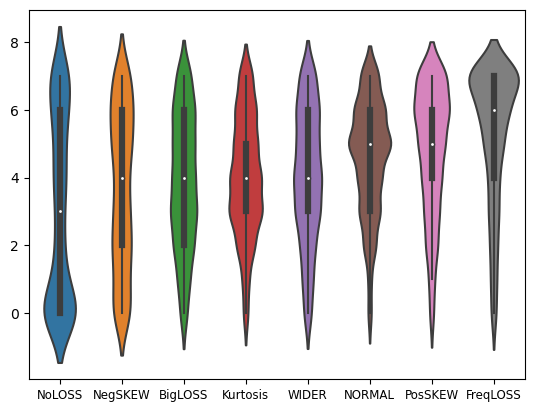

In [15]:
sns.violinplot(survey24CommDistrib.iloc[:, [6, 1, 3, 7, 4, 0, 2, 5]])
plt.xticks(fontsize=8.5)

plt.show()

## Professional Investors

In [16]:
survey24InvDistrib = survey24Inv.iloc[:, [14, 15, 16, 17, 18, 19, 20, 21]]
survey24InvDistrib

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
5,4,3,3,2,2,6,3,6
7,6,6,7,7,4,3,7,7
8,5,6,7,6,5,7,6,5
17,5,1,4,2,2,6,0,2
19,5,4,6,6,5,4,6,5
...,...,...,...,...,...,...,...,...
967,7,7,7,7,7,7,7,7
968,0,0,1,1,0,0,2,0
971,2,2,1,3,3,2,3,1
978,4,3,4,4,7,7,0,2


In [17]:
survey22InvDistrib = survey22Inv.iloc[:, [6, 7, 8, 9, 10, 11, 12, 13]]
survey22InvDistrib

,NegSKEW,NORMAL,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,5.0,2,5,0,0,7,0,0
1,4.0,3,5,7,6,3,5,0
2,2.0,3,3,5,4,6,1,3
3,4.0,6,6,5,5,7,5,6
4,5.0,4,3,4,6,5,1,6
...,...,...,...,...,...,...,...,...
481,2.0,3,4,0,0,5,1,0
482,4.0,4,6,3,3,7,0,3
483,7.0,7,7,7,7,7,7,7
484,2.0,5,1,5,4,4,5,5


In [18]:
surveyInv = pd.concat([survey24InvDistrib, survey22InvDistrib]).reset_index(drop = True)
surveyInv

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,4,3.0,3,2,2,6,3,6
1,6,6.0,7,7,4,3,7,7
2,5,6.0,7,6,5,7,6,5
3,5,1.0,4,2,2,6,0,2
4,5,4.0,6,6,5,4,6,5
...,...,...,...,...,...,...,...,...
728,3,2.0,4,0,0,5,1,0
729,4,4.0,6,3,3,7,0,3
730,7,7.0,7,7,7,7,7,7
731,5,2.0,1,5,4,4,5,5


In [19]:
surveyInv.describe()

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
count,733.000000,732.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,4.111869,3.684426,4.568895,3.436562,3.646658,5.398363,2.394270,3.821282
std,1.674637,2.105332,1.817406,1.754892,1.898908,1.823375,2.599142,1.650297
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,0.000000,3.000000
50%,4.000000,4.000000,5.000000,3.000000,3.000000,6.000000,1.000000,4.000000
75%,5.000000,5.000000,6.000000,5.000000,5.000000,7.000000,5.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


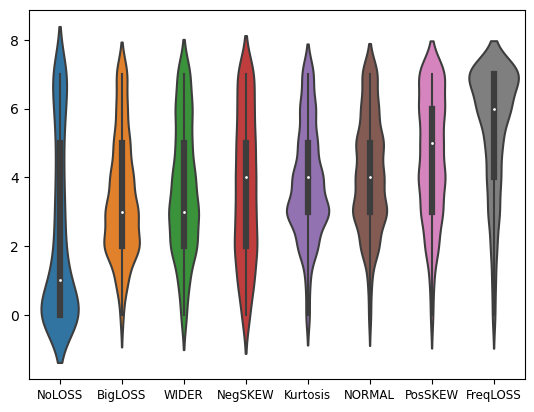

In [20]:
sns.violinplot(surveyInv.iloc[:, [6, 3, 4, 1, 7, 0, 2, 5]])
plt.xticks(fontsize=8.5)

plt.show()

## Combined

In [21]:
surveyInv

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,4,3.0,3,2,2,6,3,6
1,6,6.0,7,7,4,3,7,7
2,5,6.0,7,6,5,7,6,5
3,5,1.0,4,2,2,6,0,2
4,5,4.0,6,6,5,4,6,5
...,...,...,...,...,...,...,...,...
728,3,2.0,4,0,0,5,1,0
729,4,4.0,6,3,3,7,0,3
730,7,7.0,7,7,7,7,7,7
731,5,2.0,1,5,4,4,5,5


In [22]:
survey24CommDistrib

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,4,3,5,2,1,2,0,7
1,5,5,6,4,6,5,3,4
2,7,7,7,7,7,7,7,7
3,3,7,2,6,6,2,6,6
4,4,4,7,6,7,7,7,7
...,...,...,...,...,...,...,...,...
979,3,0,7,5,5,7,0,4
980,6,1,6,4,4,7,1,4
981,3,3,2,3,3,3,2,3
983,4,4,4,4,4,4,3,4


In [23]:
surveyALL = pd.concat([survey24CommDistrib, surveyInv]).reset_index(drop = True)
surveyALL

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,4,3.0,5,2,1,2,0,7
1,5,5.0,6,4,6,5,3,4
2,7,7.0,7,7,7,7,7,7
3,3,7.0,2,6,6,2,6,6
4,4,4.0,7,6,7,7,7,7
...,...,...,...,...,...,...,...,...
1466,3,2.0,4,0,0,5,1,0
1467,4,4.0,6,3,3,7,0,3
1468,7,7.0,7,7,7,7,7,7
1469,5,2.0,1,5,4,4,5,5


In [24]:
surveyALL.describe()

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
count,1471.000000,1470.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,4.343984,3.655102,4.675051,3.646499,3.827328,5.330387,2.704283,3.906186
std,1.687478,2.222807,1.860194,1.882642,1.941691,1.925029,2.688140,1.711715
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,0.000000,3.000000
50%,5.000000,4.000000,5.000000,3.000000,4.000000,6.000000,2.000000,4.000000
75%,6.000000,6.000000,6.000000,5.000000,5.000000,7.000000,5.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


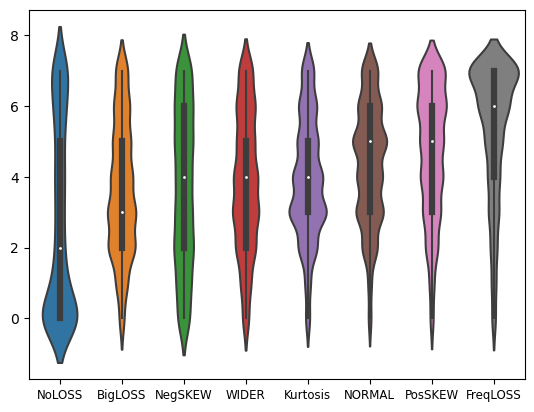

In [25]:
sns.violinplot(surveyALL.iloc[:, [6, 3, 1, 4, 7, 0, 2, 5]])
plt.xticks(fontsize=8.5)

plt.show()

# Individually Mean Adjusted

## Common Investors

In [26]:
survey24CommDistrib

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,4,3,5,2,1,2,0,7
1,5,5,6,4,6,5,3,4
2,7,7,7,7,7,7,7,7
3,3,7,2,6,6,2,6,6
4,4,4,7,6,7,7,7,7
...,...,...,...,...,...,...,...,...
979,3,0,7,5,5,7,0,4
980,6,1,6,4,4,7,1,4
981,3,3,2,3,3,3,2,3
983,4,4,4,4,4,4,3,4


In [27]:
survey24CommDistribMeanAdj = survey24CommDistrib.copy().reset_index(drop = True)
survey24CommDistribMeanAdj["Individual Mean"] = survey24CommDistribMeanAdj.mean(axis = 1)
survey24CommDistribMeanAdj.iloc[:, 0:8] = survey24CommDistribMeanAdj.iloc[:, 0:8].sub(survey24CommDistribMeanAdj["Individual Mean"], axis = 0)
survey24CommDistribMeanAdj

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis,Individual Mean
0,1.000,0.000,2.000,-1.000,-2.000,-1.000,-3.000,4.000,3.000
1,0.250,0.250,1.250,-0.750,1.250,0.250,-1.750,-0.750,4.750
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000
3,-1.750,2.250,-2.750,1.250,1.250,-2.750,1.250,1.250,4.750
4,-2.125,-2.125,0.875,-0.125,0.875,0.875,0.875,0.875,6.125
...,...,...,...,...,...,...,...,...,...
733,-0.875,-3.875,3.125,1.125,1.125,3.125,-3.875,0.125,3.875
734,1.875,-3.125,1.875,-0.125,-0.125,2.875,-3.125,-0.125,4.125
735,0.250,0.250,-0.750,0.250,0.250,0.250,-0.750,0.250,2.750
736,0.125,0.125,0.125,0.125,0.125,0.125,-0.875,0.125,3.875


In [28]:
survey24CommDistribMeanAdj.describe()

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis,Individual Mean
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,0.435976,-0.512534,0.641938,-0.283537,-0.131775,1.124322,-1.126355,-0.148035,4.138550
std,1.333335,1.768346,1.595717,1.299682,1.409618,1.977946,2.107191,1.180792,1.297939
min,-5.250000,-5.375000,-4.375000,-4.625000,-5.000000,-4.625000,-5.375000,-6.125000,0.000000
25%,-0.250000,-1.750000,-0.375000,-1.125000,-0.875000,-0.125000,-3.125000,-0.750000,3.375000
50%,0.375000,-0.375000,0.500000,-0.125000,0.000000,1.000000,-1.000000,0.000000,4.000000
75%,1.250000,0.500000,1.875000,0.500000,0.625000,2.875000,0.500000,0.500000,5.000000
max,5.250000,4.375000,5.625000,4.000000,4.625000,6.125000,4.000000,4.000000,7.000000


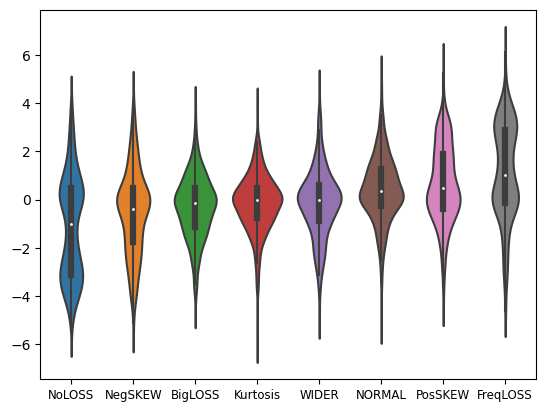

In [29]:
sns.violinplot(survey24CommDistribMeanAdj.loc[:, survey24CommDistribMeanAdj.iloc[:, 0:8].mean().to_frame().sort_values(by = 0).index])
plt.xticks(fontsize=8.5)

plt.show()

## Professional Investors

In [30]:
surveyInv

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,4,3.0,3,2,2,6,3,6
1,6,6.0,7,7,4,3,7,7
2,5,6.0,7,6,5,7,6,5
3,5,1.0,4,2,2,6,0,2
4,5,4.0,6,6,5,4,6,5
...,...,...,...,...,...,...,...,...
728,3,2.0,4,0,0,5,1,0
729,4,4.0,6,3,3,7,0,3
730,7,7.0,7,7,7,7,7,7
731,5,2.0,1,5,4,4,5,5


In [31]:
surveyInvMeanAdj = surveyInv.copy().reset_index(drop = True)
surveyInvMeanAdj["Individual Mean"] = surveyInvMeanAdj.mean(axis = 1)
surveyInvMeanAdj.iloc[:, 0:8] = surveyInvMeanAdj.iloc[:, 0:8].sub(surveyInvMeanAdj["Individual Mean"], axis = 0)
surveyInvMeanAdj

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis,Individual Mean
0,0.375,-0.625,-0.625,-1.625,-1.625,2.375,-0.625,2.375,3.625
1,0.125,0.125,1.125,1.125,-1.875,-2.875,1.125,1.125,5.875
2,-0.875,0.125,1.125,0.125,-0.875,1.125,0.125,-0.875,5.875
3,2.250,-1.750,1.250,-0.750,-0.750,3.250,-2.750,-0.750,2.750
4,-0.125,-1.125,0.875,0.875,-0.125,-1.125,0.875,-0.125,5.125
...,...,...,...,...,...,...,...,...,...
728,1.125,0.125,2.125,-1.875,-1.875,3.125,-0.875,-1.875,1.875
729,0.250,0.250,2.250,-0.750,-0.750,3.250,-3.750,-0.750,3.750
730,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000
731,1.125,-1.875,-2.875,1.125,0.125,0.125,1.125,1.125,3.875


In [32]:
surveyInvMeanAdj.describe()

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis,Individual Mean
count,733.000000,732.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,0.229195,-0.199454,0.686221,-0.446112,-0.236016,1.515689,-1.488404,-0.061392,3.882674
std,1.188081,1.528292,1.431176,1.130562,1.437528,1.731487,1.980144,1.087050,1.264214
min,-4.375000,-4.625000,-4.375000,-4.375000,-4.625000,-3.875000,-5.500000,-4.125000,0.000000
25%,-0.375000,-1.250000,-0.250000,-1.125000,-1.125000,0.125000,-3.000000,-0.625000,3.000000
50%,0.250000,-0.250000,0.750000,-0.375000,-0.125000,1.875000,-2.000000,0.000000,3.750000
75%,0.875000,0.750000,1.625000,0.250000,0.625000,2.875000,0.000000,0.500000,4.625000
max,6.125000,5.750000,4.375000,3.625000,4.125000,4.875000,4.875000,3.500000,7.000000


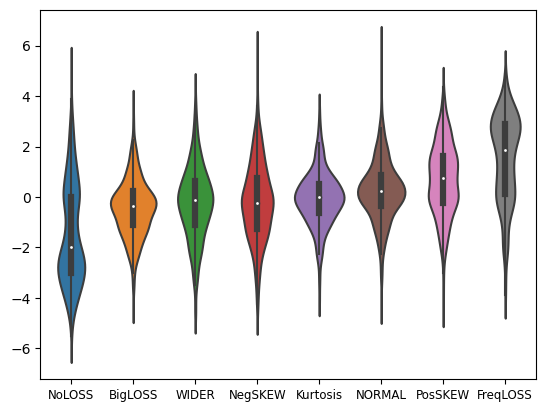

In [33]:
sns.violinplot(surveyInvMeanAdj.loc[:, surveyInvMeanAdj.iloc[:, 0:8].mean().to_frame().sort_values(by = 0).index])
plt.xticks(fontsize=8.5)

plt.show()

## Combined

In [34]:
surveyALL

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,4,3.0,5,2,1,2,0,7
1,5,5.0,6,4,6,5,3,4
2,7,7.0,7,7,7,7,7,7
3,3,7.0,2,6,6,2,6,6
4,4,4.0,7,6,7,7,7,7
...,...,...,...,...,...,...,...,...
1466,3,2.0,4,0,0,5,1,0
1467,4,4.0,6,3,3,7,0,3
1468,7,7.0,7,7,7,7,7,7
1469,5,2.0,1,5,4,4,5,5


In [35]:
surveyALLMeanAdj = surveyALL.copy().reset_index(drop = True)
surveyALLMeanAdj["Individual Mean"] = surveyALLMeanAdj.mean(axis = 1)
surveyALLMeanAdj.iloc[:, 0:8] = surveyALLMeanAdj.iloc[:, 0:8].sub(surveyALLMeanAdj["Individual Mean"], axis = 0)
surveyALLMeanAdj

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis,Individual Mean
0,1.000,0.000,2.000,-1.000,-2.000,-1.000,-3.000,4.000,3.000
1,0.250,0.250,1.250,-0.750,1.250,0.250,-1.750,-0.750,4.750
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000
3,-1.750,2.250,-2.750,1.250,1.250,-2.750,1.250,1.250,4.750
4,-2.125,-2.125,0.875,-0.125,0.875,0.875,0.875,0.875,6.125
...,...,...,...,...,...,...,...,...,...
1466,1.125,0.125,2.125,-1.875,-1.875,3.125,-0.875,-1.875,1.875
1467,0.250,0.250,2.250,-0.750,-0.750,3.250,-3.750,-0.750,3.750
1468,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.000
1469,1.125,-1.875,-2.875,1.125,0.125,0.125,1.125,1.125,3.875


In [36]:
surveyALLMeanAdj.describe()

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis,Individual Mean
count,1471.000000,1470.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,0.332937,-0.356633,0.664004,-0.364548,-0.183719,1.319341,-1.306764,-0.104861,4.011047
std,1.266844,1.660012,1.515607,1.220645,1.424064,1.868871,2.052180,1.135490,1.287187
min,-5.250000,-5.375000,-4.375000,-4.625000,-5.000000,-4.625000,-5.500000,-6.125000,0.000000
25%,-0.375000,-1.500000,-0.375000,-1.125000,-1.000000,0.000000,-3.000000,-0.750000,3.125000
50%,0.250000,-0.250000,0.500000,-0.250000,-0.125000,1.500000,-1.625000,0.000000,3.875000
75%,1.000000,0.625000,1.750000,0.375000,0.625000,2.875000,0.375000,0.500000,4.750000
max,6.125000,5.750000,5.625000,4.000000,4.625000,6.125000,4.875000,4.000000,7.000000


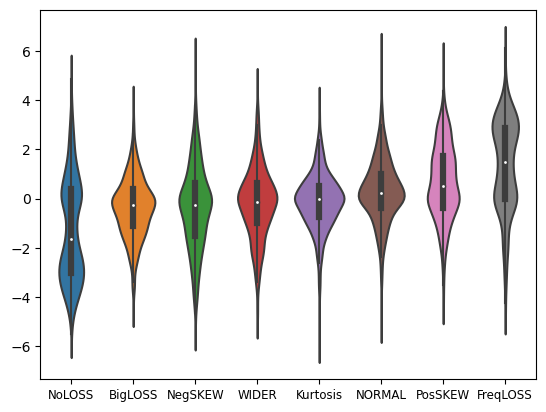

In [37]:
sns.violinplot(surveyALLMeanAdj.loc[:, surveyALLMeanAdj.iloc[:, 0:8].mean().to_frame().sort_values(by = 0).index])
plt.xticks(fontsize=8.5)

plt.show()

# Mean Centering

## Common Investors

In [38]:
survey24CommDistrib

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,4,3,5,2,1,2,0,7
1,5,5,6,4,6,5,3,4
2,7,7,7,7,7,7,7,7
3,3,7,2,6,6,2,6,6
4,4,4,7,6,7,7,7,7
...,...,...,...,...,...,...,...,...
979,3,0,7,5,5,7,0,4
980,6,1,6,4,4,7,1,4
981,3,3,2,3,3,3,2,3
983,4,4,4,4,4,4,3,4


In [39]:
survey24CommDistribMeanCen = survey24CommDistrib.copy().reset_index(drop = True)
survey24CommDistribMeanCen.mean(axis = 0)

NORMAL      4.574526
NegSKEW     3.626016
PosSKEW     4.780488
BigLOSS     3.855014
WIDER       4.006775
FreqLOSS    5.262873
NoLOSS      3.012195
Kurtosis    3.990515
dtype: float64

In [40]:
survey24CommDistribMeanCen.iloc[:, 0:8] = survey24CommDistribMeanCen.iloc[:, 0:8].sub(survey24CommDistribMeanCen.mean(axis = 0), axis = 1)
survey24CommDistribMeanCen

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,-0.574526,-0.626016,0.219512,-1.855014,-3.006775,-3.262873,-3.012195,3.009485
1,0.425474,1.373984,1.219512,0.144986,1.993225,-0.262873,-0.012195,0.009485
2,2.425474,3.373984,2.219512,3.144986,2.993225,1.737127,3.987805,3.009485
3,-1.574526,3.373984,-2.780488,2.144986,1.993225,-3.262873,2.987805,2.009485
4,-0.574526,0.373984,2.219512,2.144986,2.993225,1.737127,3.987805,3.009485
...,...,...,...,...,...,...,...,...
733,-1.574526,-3.626016,2.219512,1.144986,0.993225,1.737127,-3.012195,0.009485
734,1.425474,-2.626016,1.219512,0.144986,-0.006775,1.737127,-2.012195,0.009485
735,-1.574526,-0.626016,-2.780488,-0.855014,-1.006775,-2.262873,-1.012195,-0.990515
736,-0.574526,0.373984,-0.780488,0.144986,-0.006775,-1.262873,-0.012195,0.009485


In [41]:
survey24CommDistribMeanCen.describe()

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
count,7.380000e+02,7.380000e+02,7.380000e+02,7.380000e+02,7.380000e+02,7.380000e+02,7.380000e+02,7.380000e+02
mean,-4.332578e-17,1.107214e-16,1.636752e-16,1.781171e-16,2.406988e-16,-4.862115e-16,1.083144e-16,2.888385e-17
std,1.669586e+00,2.334561e+00,1.897094e+00,1.980737e+00,1.968189e+00,2.019915e+00,2.740938e+00,1.767693e+00
min,-4.574526e+00,-3.626016e+00,-4.780488e+00,-3.855014e+00,-4.006775e+00,-5.262873e+00,-3.012195e+00,-3.990515e+00
25%,-1.574526e+00,-1.626016e+00,-7.804878e-01,-1.855014e+00,-1.006775e+00,-1.262873e+00,-3.012195e+00,-9.905149e-01
50%,4.254743e-01,3.739837e-01,2.195122e-01,1.449864e-01,-6.775068e-03,7.371274e-01,-1.219512e-02,9.485095e-03
75%,1.425474e+00,2.373984e+00,1.219512e+00,2.144986e+00,1.993225e+00,1.737127e+00,2.987805e+00,1.009485e+00
max,2.425474e+00,3.373984e+00,2.219512e+00,3.144986e+00,2.993225e+00,1.737127e+00,3.987805e+00,3.009485e+00


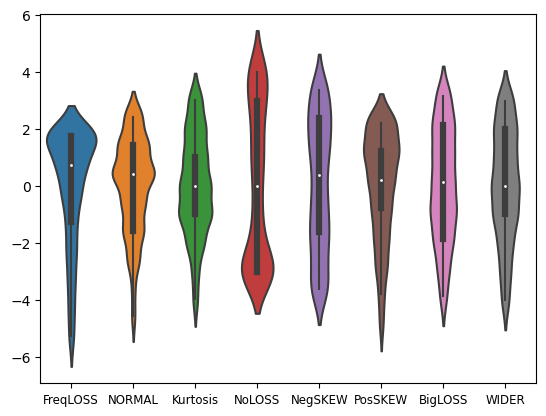

In [42]:
sns.violinplot(survey24CommDistribMeanCen.loc[:, survey24CommDistribMeanCen.iloc[:, 0:8].mean().to_frame().sort_values(by = 0).index])
plt.xticks(fontsize=8.5)

plt.show()

## Professional Investors

In [43]:
surveyInv

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,4,3.0,3,2,2,6,3,6
1,6,6.0,7,7,4,3,7,7
2,5,6.0,7,6,5,7,6,5
3,5,1.0,4,2,2,6,0,2
4,5,4.0,6,6,5,4,6,5
...,...,...,...,...,...,...,...,...
728,3,2.0,4,0,0,5,1,0
729,4,4.0,6,3,3,7,0,3
730,7,7.0,7,7,7,7,7,7
731,5,2.0,1,5,4,4,5,5


In [44]:
surveyInvMeanCen = surveyInv.copy().reset_index(drop = True)
surveyInvMeanCen.mean(axis = 0)

NORMAL      4.111869
NegSKEW     3.684426
PosSKEW     4.568895
BigLOSS     3.436562
WIDER       3.646658
FreqLOSS    5.398363
NoLOSS      2.394270
Kurtosis    3.821282
dtype: float64

In [45]:
surveyInvMeanCen.iloc[:, 0:8] = surveyInvMeanCen.iloc[:, 0:8].sub(surveyInvMeanCen.mean(axis = 0), axis = 1)
surveyInvMeanCen

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,-0.111869,-0.684426,-1.568895,-1.436562,-1.646658,0.601637,0.60573,2.178718
1,1.888131,2.315574,2.431105,3.563438,0.353342,-2.398363,4.60573,3.178718
2,0.888131,2.315574,2.431105,2.563438,1.353342,1.601637,3.60573,1.178718
3,0.888131,-2.684426,-0.568895,-1.436562,-1.646658,0.601637,-2.39427,-1.821282
4,0.888131,0.315574,1.431105,2.563438,1.353342,-1.398363,3.60573,1.178718
...,...,...,...,...,...,...,...,...
728,-1.111869,-1.684426,-0.568895,-3.436562,-3.646658,-0.398363,-1.39427,-3.821282
729,-0.111869,0.315574,1.431105,-0.436562,-0.646658,1.601637,-2.39427,-0.821282
730,2.888131,3.315574,2.431105,3.563438,3.353342,1.601637,4.60573,3.178718
731,0.888131,-1.684426,-3.568895,1.563438,0.353342,-1.398363,2.60573,1.178718


In [46]:
surveyInvMeanCen.describe()

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
count,7.330000e+02,732.000000,7.330000e+02,7.330000e+02,7.330000e+02,7.330000e+02,7.330000e+02,7.330000e+02
mean,7.754900e-17,0.000000,7.754900e-17,-3.101960e-16,7.754900e-17,-2.908088e-17,-3.877450e-16,3.877450e-17
std,1.674637e+00,2.105332,1.817406e+00,1.754892e+00,1.898908e+00,1.823375e+00,2.599142e+00,1.650297e+00
min,-4.111869e+00,-3.684426,-4.568895e+00,-3.436562e+00,-3.646658e+00,-5.398363e+00,-2.394270e+00,-3.821282e+00
25%,-1.111869e+00,-1.684426,-1.568895e+00,-1.436562e+00,-1.646658e+00,-1.398363e+00,-2.394270e+00,-8.212824e-01
50%,-1.118690e-01,0.315574,4.311050e-01,-4.365621e-01,-6.466576e-01,6.016371e-01,-1.394270e+00,1.787176e-01
75%,8.881310e-01,1.315574,1.431105e+00,1.563438e+00,1.353342e+00,1.601637e+00,2.605730e+00,1.178718e+00
max,2.888131e+00,3.315574,2.431105e+00,3.563438e+00,3.353342e+00,1.601637e+00,4.605730e+00,3.178718e+00


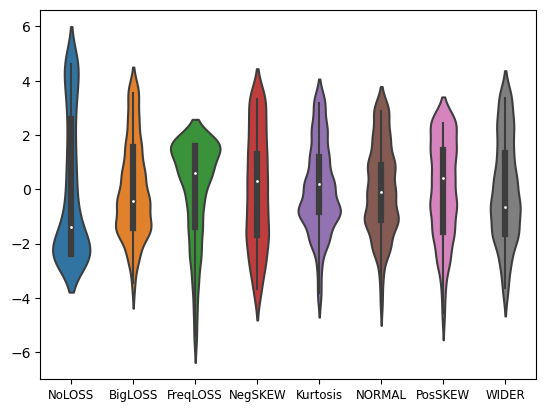

In [47]:
sns.violinplot(surveyInvMeanCen.loc[:, surveyInvMeanCen.iloc[:, 0:8].mean().to_frame().sort_values(by = 0).index])
plt.xticks(fontsize=8.5)

plt.show()

## Combined

In [48]:
surveyALL

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,4,3.0,5,2,1,2,0,7
1,5,5.0,6,4,6,5,3,4
2,7,7.0,7,7,7,7,7,7
3,3,7.0,2,6,6,2,6,6
4,4,4.0,7,6,7,7,7,7
...,...,...,...,...,...,...,...,...
1466,3,2.0,4,0,0,5,1,0
1467,4,4.0,6,3,3,7,0,3
1468,7,7.0,7,7,7,7,7,7
1469,5,2.0,1,5,4,4,5,5


In [49]:
surveyALLMeanCen = surveyALL.copy().reset_index(drop = True)
surveyALLMeanCen.mean(axis = 0)

NORMAL      4.343984
NegSKEW     3.655102
PosSKEW     4.675051
BigLOSS     3.646499
WIDER       3.827328
FreqLOSS    5.330387
NoLOSS      2.704283
Kurtosis    3.906186
dtype: float64

In [50]:
surveyALLMeanCen.iloc[:, 0:8] = surveyALLMeanCen.iloc[:, 0:8].sub(surveyALLMeanCen.mean(axis = 0), axis = 1)
surveyALLMeanCen

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
0,-0.343984,-0.655102,0.324949,-1.646499,-2.827328,-3.330387,-2.704283,3.093814
1,0.656016,1.344898,1.324949,0.353501,2.172672,-0.330387,0.295717,0.093814
2,2.656016,3.344898,2.324949,3.353501,3.172672,1.669613,4.295717,3.093814
3,-1.343984,3.344898,-2.675051,2.353501,2.172672,-3.330387,3.295717,2.093814
4,-0.343984,0.344898,2.324949,2.353501,3.172672,1.669613,4.295717,3.093814
...,...,...,...,...,...,...,...,...
1466,-1.343984,-1.655102,-0.675051,-3.646499,-3.827328,-0.330387,-1.704283,-3.906186
1467,-0.343984,0.344898,1.324949,-0.646499,-0.827328,1.669613,-2.704283,-0.906186
1468,2.656016,3.344898,2.324949,3.353501,3.172672,1.669613,4.295717,3.093814
1469,0.656016,-1.655102,-3.675051,1.353501,0.172672,-1.330387,2.295717,1.093814


In [51]:
surveyALLMeanCen.describe()

,NORMAL,NegSKEW,PosSKEW,BigLOSS,WIDER,FreqLOSS,NoLOSS,Kurtosis
count,1.471000e+03,1.470000e+03,1.471000e+03,1.471000e+03,1.471000e+03,1.471000e+03,1.471000e+03,1.471000e+03
mean,-3.864270e-17,-1.691768e-16,4.830338e-17,9.660676e-17,1.932135e-16,1.497405e-16,-1.545708e-16,7.728541e-17
std,1.687478e+00,2.222807e+00,1.860194e+00,1.882642e+00,1.941691e+00,1.925029e+00,2.688140e+00,1.711715e+00
min,-4.343984e+00,-3.655102e+00,-4.675051e+00,-3.646499e+00,-3.827328e+00,-5.330387e+00,-2.704283e+00,-3.906186e+00
25%,-1.343984e+00,-1.655102e+00,-1.675051e+00,-1.646499e+00,-1.827328e+00,-1.330387e+00,-2.704283e+00,-9.061863e-01
50%,6.560163e-01,3.448980e-01,3.249490e-01,-6.464990e-01,1.726717e-01,6.696125e-01,-7.042828e-01,9.381373e-02
75%,1.656016e+00,2.344898e+00,1.324949e+00,1.353501e+00,1.172672e+00,1.669613e+00,2.295717e+00,1.093814e+00
max,2.656016e+00,3.344898e+00,2.324949e+00,3.353501e+00,3.172672e+00,1.669613e+00,4.295717e+00,3.093814e+00


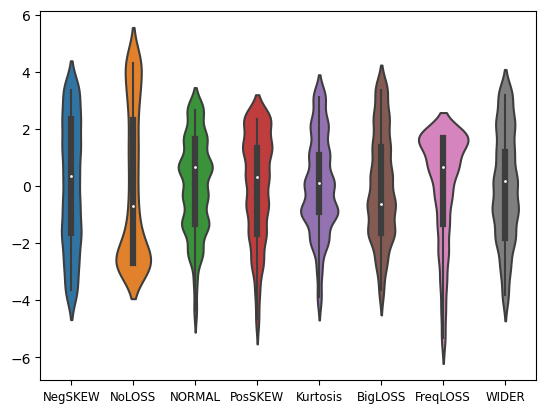

In [52]:
sns.violinplot(surveyALLMeanCen.loc[:, surveyALLMeanCen.iloc[:, 0:8].mean().to_frame().sort_values(by = 0).index])
plt.xticks(fontsize=8.5)

plt.show()

NORMAL      7.754900e-17
NegSKEW     0.000000e+00
PosSKEW     7.754900e-17
BigLOSS    -3.101960e-16
WIDER       7.754900e-17
FreqLOSS   -2.908088e-17
NoLOSS     -3.877450e-16
Kurtosis    3.877450e-17
dtype: float64